# Imports

In [4]:
#importing required libraries
import numpy as np
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt

# Loading Data

In [5]:
#declaring path for loading data
PATH = r'C:\Users\vivek\Desktop\daatset'

In [11]:
#
image_generator = ImageDataGenerator(rescale = 1/255, validation_split = 0.2)
train_dataset = image_generator.flow_from_directory(batch_size = 32,
                                                   directory = PATH,
                                                   shuffle = True,
                                                   target_size = (224, 224),
                                                   subset = 'training',
                                                   class_mode = 'categorical')
test_dataset = image_generator.flow_from_directory(batch_size = 32,
                                                  directory = PATH,
                                                  shuffle = True,
                                                  target_size = (224, 224),
                                                  subset = 'validation',
                                                  class_mode = 'categorical')

Found 1101 images belonging to 2 classes.
Found 275 images belonging to 2 classes.


# Creating Model

In [12]:
from tensorflow.keras.applications import MobileNetV2

In [15]:
first_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

In [18]:
def fc(first_Model):
    second_model = first_Model.output
    second_model = tf.keras.layers.GlobalAveragePooling2D()(second_model)
    second_model = tf.keras.layers.Dense(1024,activation='relu')(second_model)
    second_model = tf.keras.layers.Dense(1024,activation='relu')(second_model)
    second_model = tf.keras.layers.Dense(512,activation='relu')(second_model)
    second_model = tf.keras.layers.Dense(2,activation='softmax')(second_model)
    return second_model

In [19]:
from tensorflow.keras.models import Model

In [20]:
full_model = fc(first_model)

In [21]:
model = Model(inputs = first_model.input, outputs = full_model)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
______________________________________________________________________________________________

In [22]:
for layer in first_model.layers:
	layer.trainable = False

In [24]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Training model

In [25]:
history = model.fit(train_dataset, epochs = 10, validation_data = test_dataset)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 35 steps, validate for 9 steps
Epoch 1/10
35/35 [==============================] - 51s 1s/step - loss: 0.4792 - accuracy: 0.8220 - val_loss: 0.0646 - val_accuracy: 0.9782
Epoch 2/10
35/35 [==============================] - 43s 1s/step - loss: 0.0809 - accuracy: 0.9682 - val_loss: 0.3338 - val_accuracy: 0.8982
Epoch 3/10
35/35 [==============================] - 42s 1s/step - loss: 0.0424 - accuracy: 0.9837 - val_loss: 0.2561 - val_accuracy: 0.9382
Epoch 4/10
35/35 [==============================] - 43s 1s/step - loss: 0.1163 - accuracy: 0.9555 - val_loss: 0.0977 - val_accuracy: 0.9818
Epoch 5/10
35/35 [==============================] - 44s 1s/step - loss: 0.0041 - accuracy: 0.9982 - val_loss: 0.4106 - val_accuracy: 0.9418
Epoch 6/10
35/35 [==============================] - 42s 1s/step - loss: 0.0292 - accuracy: 0.9946 - val_loss: 0.1677 - val_accuracy: 0.9600
Epoch 7/10
35/35 [==============================] - 42s 1s/step - los

# Plot history

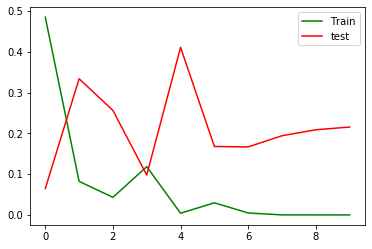

In [26]:
fig = plt.figure()
plt.plot(history.epoch,  history.history['loss'] ,label='Train', color='green')
plt.plot(history.epoch,  history.history['val_loss'] ,label='test', color='red')
plt.legend()
plt.show()

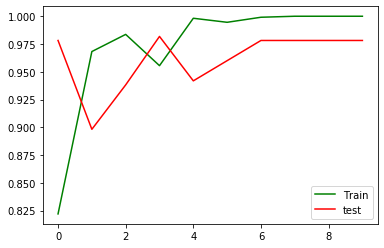

In [27]:
fig = plt.figure()
plt.plot(history.epoch,  history.history['accuracy'] ,label='Train', color='green')
plt.plot(history.epoch,  history.history['val_accuracy'] ,label='test', color='red')
plt.legend()
plt.show()

In [28]:
model.evaluate(test_dataset)

  ...
    to  
  ['...']
9/9 [==============================] - 6s 716ms/step - loss: 0.2154 - accuracy: 0.9782


[0.21539530076878086, 0.97818184]

# Saving model

In [29]:
json_model = model.to_json()
with open("maskModel.json", "w") as json_file:
    json_file.write(json_model)
model.save_weights('maskModel.h5')